In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from PyALE import ale
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

In [2]:
file_path = r"C:\Users\24652\Desktop\PCA.csv"
data = pd.read_csv(file_path)
data.head()

,GEOID,CT_5digit,bphigh,chd,diabetes,highchol,obesity,SE1,SE2,SE3,...,SE8,BE1,BE2,BE3,BE4,BE5,BE6,NE1,NE2,NE3
0,6001400100,400100,29,5,8,34.40000153,21,3.123290973,0.144717156,1.187350731,...,1.166741387,-0.857288587,-1.627305274,-2.625881069,0.321238057,2.107881789,0.589471818,-0.944376479,1.078795183,13.03417421
1,6001400200,400200,23.79999924,3.799999952,6.199999809,29.29999924,21.5,2.698826034,0.043161642,2.243240899,...,1.058234845,-0.587632927,-0.335002414,-1.202506789,1.246990094,-0.533906819,0.630889794,-0.778854431,0.987627871,13.48972676
2,6001400300,400300,22.29999924,3.200000048,5.900000095,26.29999924,23.10000038,1.087873767,-0.702454911,2.458357614,...,0.657572734,-0.515263926,0.658151709,-0.672289048,1.309892761,-0.289280132,0.293233066,-0.710708295,0.897928186,13.69176924
3,6001400400,400400,21.70000076,3.099999905,5.800000191,25.10000038,23.29999924,1.520427739,-0.13030368,2.089964612,...,1.391864614,-0.566563231,0.637646254,-1.141694342,-0.071720218,0.030480235,0.381744109,-0.716374275,1.137406552,13.56917091
4,6001400500,400500,24,3.299999952,7,24.10000038,25.60000038,0.920496573,-0.623241655,2.177101644,...,1.128315869,-0.605359314,0.475750319,-0.399325316,-0.03785118,0.038340413,0.3468689,-0.433929912,1.223648393,13.77581767


In [3]:
# Convert object columns to numeric
data[['SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SE8',
      'BE1', 'BE2', 'BE3', 'BE4', 'BE5', 'BE6',
      'NE1', 'NE2', 'NE3', 'obesity']] = data[['SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SE8',
                                    'BE1', 'BE2', 'BE3', 'BE4', 'BE5', 'BE6',
                                    'NE1', 'NE2', 'NE3', 'obesity']].apply(pd.to_numeric, errors='coerce')

# Select only the columns with float64 data type
float_cols = data.select_dtypes(include=['float64'])

# Fill missing values in float64 columns with the mean of each column
float_cols.fillna(float_cols.mean(), inplace=True)

# Now replace the original columns in the PCA DataFrame with the imputed columns
data[float_cols.columns] = float_cols

# Verify that missing values have been filled
print(data.isnull().sum())

GEOID        0
CT_5digit    0
bphigh       0
chd          0
diabetes     0
highchol     0
obesity      0
SE1          0
SE2          0
SE3          0
SE4          0
SE5          0
SE6          0
SE7          0
SE8          0
BE1          0
BE2          0
BE3          0
BE4          0
BE5          0
BE6          0
NE1          0
NE2          0
NE3          0
dtype: int64


In [4]:
data.head()

,GEOID,CT_5digit,bphigh,chd,diabetes,highchol,obesity,SE1,SE2,SE3,...,SE8,BE1,BE2,BE3,BE4,BE5,BE6,NE1,NE2,NE3
0,6001400100,400100,29,5,8,34.40000153,21.000000,3.123291,0.144717,1.187351,...,1.166741,-0.857289,-1.627305,-2.625881,0.321238,2.107882,0.589472,-0.944376,1.078795,13.034174
1,6001400200,400200,23.79999924,3.799999952,6.199999809,29.29999924,21.500000,2.698826,0.043162,2.243241,...,1.058235,-0.587633,-0.335002,-1.202507,1.246990,-0.533907,0.630890,-0.778854,0.987628,13.489727
2,6001400300,400300,22.29999924,3.200000048,5.900000095,26.29999924,23.100000,1.087874,-0.702455,2.458358,...,0.657573,-0.515264,0.658152,-0.672289,1.309893,-0.289280,0.293233,-0.710708,0.897928,13.691769
3,6001400400,400400,21.70000076,3.099999905,5.800000191,25.10000038,23.299999,1.520428,-0.130304,2.089965,...,1.391865,-0.566563,0.637646,-1.141694,-0.071720,0.030480,0.381744,-0.716374,1.137407,13.569171
4,6001400500,400500,24,3.299999952,7,24.10000038,25.600000,0.920497,-0.623242,2.177102,...,1.128316,-0.605359,0.475750,-0.399325,-0.037851,0.038340,0.346869,-0.433930,1.223648,13.775818


In [5]:
x = data.iloc[:, 7:]
y = data.iloc[:, 6] 

In [6]:
y

0       21.000000
1       21.500000
2       23.100000
3       23.299999
4       25.600000
          ...    
8033    27.500000
8034    30.900000
8035    23.200001
8036    28.500000
8037    30.799999
Name: obesity, Length: 8038, dtype: float64

In [7]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Train the RandomForestRegressor on the original features
regr = RandomForestRegressor(
    bootstrap=False,
    max_features=0.5,
    min_samples_leaf=5,
    min_samples_split=17,
    n_estimators=100,
    random_state=0
)
regr.fit(x_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=False, max_features=0.5, min_samples_leaf=5,
                      min_samples_split=17, random_state=0)

In [8]:
predictions = regr.predict(x_test)
regr.predict(x.iloc[0:1,:])

array([20.95037558])

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print("R-squared (R²):", r2)


R-squared (R²): 0.8775019905649173


In [10]:
# Get feature importances from the trained RandomForestRegressor model
importances = list(regr.feature_importances_)

# Get the feature names (column names from x)
characteristics = x.columns

# Pair each feature with its importance and round the importance to 2 decimal places
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]

# Sort features by importance in descending order
characteristics_importances = sorted(characteristics_importances, key=lambda x: x[1], reverse=True)

# Print each feature with its importance
for characteristic, importance in characteristics_importances:
    print(f"Variable: {characteristic:20} Importance: {importance}")


Variable: SE1                  Importance: 0.49
Variable: SE2                  Importance: 0.18
Variable: NE3                  Importance: 0.09
Variable: SE5                  Importance: 0.06
Variable: BE1                  Importance: 0.05
Variable: SE3                  Importance: 0.03
Variable: SE7                  Importance: 0.02
Variable: SE4                  Importance: 0.01
Variable: SE6                  Importance: 0.01
Variable: SE8                  Importance: 0.01
Variable: BE2                  Importance: 0.01
Variable: BE3                  Importance: 0.01
Variable: BE5                  Importance: 0.01
Variable: NE1                  Importance: 0.01
Variable: NE2                  Importance: 0.01
Variable: BE4                  Importance: 0.0
Variable: BE6                  Importance: 0.0


PyALE._ALE_generic:INFO: Continuous feature detected.


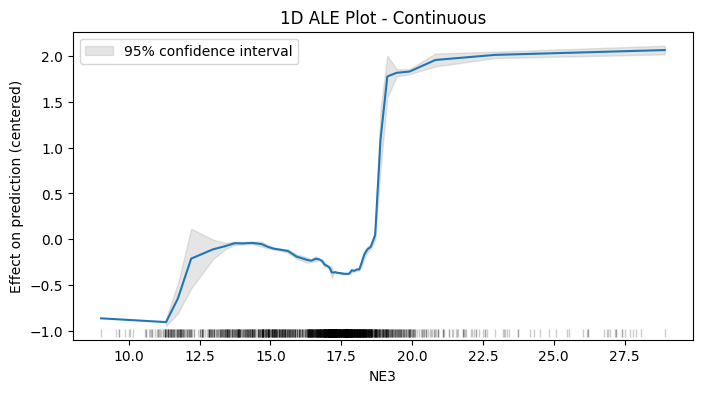

In [11]:
ale_eff = ale(X=x_test, model = regr, feature=["NE3"], grid_size=50, include_CI=True, C=0.95)


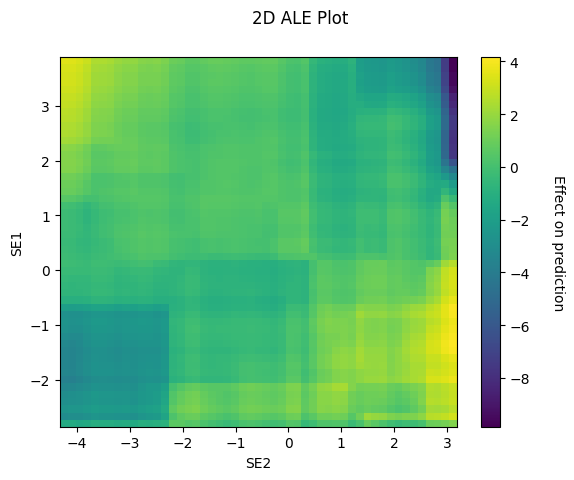

In [12]:
ale_eff = ale(X=x_test, model = regr, feature=["SE1","SE2"], grid_size=50, include_CI=True, C=0.95)

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from shapely.geometry import Point


shapefile = gpd.read_file(r'C:\Users\24652\Desktop\Study area\CENSUS_Tracts.shp')  # Replace with your shapefile

In [5]:
shapefile.head()

,GEOID,Shape_Leng,Shape_Area,geometry
0,06065941100,6603.556623,2.585513e+06,"POLYGON ((549358.658 3740268.857, 549582.092 3..."
1,06065941200,19430.321030,1.304941e+07,"POLYGON ((548488.357 3745083.752, 548489.910 3..."
2,06065044518,27241.778697,1.981582e+07,"POLYGON ((550019.241 3759548.835, 551094.647 3..."
3,06071010411,42898.641120,5.398970e+07,"POLYGON ((558102.034 3780527.476, 558108.843 3..."
4,06071010412,22756.566011,2.760740e+07,"POLYGON ((558114.056 3777296.070, 558115.165 3..."


In [6]:
# Ensure geoid column names match between the two datasets
data['GEOID'] = data['GEOID'].astype(str)
shapefile['GEOID'] = shapefile['GEOID'].astype(str).str[1:]

In [7]:
# Merge CSV and Shapefile on `geoid`
gdf = shapefile.merge(data, on='GEOID', how='right')

In [8]:
gdf.head()

,GEOID,Shape_Leng,Shape_Area,geometry,CT_5digit,bphigh,chd,diabetes,highchol,obesity,...,SE8,BE1,BE2,BE3,BE4,BE5,BE6,NE1,NE2,NE3
0,6001400100,13914.779899,6.918288e+06,"POLYGON ((41288.615 4202841.069, 41301.393 420...",400100,29,5,8,34.40000153,21.000000,...,1.166741,-0.857289,-1.627305,-2.625881,0.321238,2.107882,0.589472,-0.944376,1.078795,13.034174
1,6001400200,3991.630534,6.057243e+05,"POLYGON ((38690.777 4202372.377, 38692.971 420...",400200,23.79999924,3.799999952,6.199999809,29.29999924,21.500000,...,1.058235,-0.587633,-0.335002,-1.202507,1.246990,-0.533907,0.630890,-0.778854,0.987628,13.489727
2,6001400300,5411.769009,1.105518e+06,"POLYGON ((37822.518 4200763.057, 37771.201 420...",400300,22.29999924,3.200000048,5.900000095,26.29999924,23.100000,...,0.657573,-0.515264,0.658152,-0.672289,1.309893,-0.289280,0.293233,-0.710708,0.897928,13.691769
3,6001400400,3679.882680,6.831924e+05,"POLYGON ((37688.142 4202325.364, 37664.222 420...",400400,21.70000076,3.099999905,5.800000191,25.10000038,23.299999,...,1.391865,-0.566563,0.637646,-1.141694,-0.071720,0.030480,0.381744,-0.716374,1.137407,13.569171
4,6001400500,3256.020780,5.985003e+05,"POLYGON ((37087.895 4202526.835, 37057.312 420...",400500,24,3.299999952,7,24.10000038,25.600000,...,1.128316,-0.605359,0.475750,-0.399325,-0.037851,0.038340,0.346869,-0.433930,1.223648,13.775818


In [45]:
# Define Independent and Dependent Variables
x = gdf.iloc[:, 10:]  # Independent variables
y = gdf.iloc[:, 9]   # Dependent variable
y

0       21.000000
1       21.500000
2       23.100000
3       23.299999
4       25.600000
          ...    
8033    27.500000
8034    30.900000
8035    23.200001
8036    28.500000
8037    30.799999
Name: obesity, Length: 8038, dtype: float64

In [46]:
# Step 2: Fit a Global Random Forest Model
rf_model = RandomForestRegressor(n_estimators=500, max_features=6, random_state=42)
rf_model.fit(x, y)

# Global Variable Importance
global_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Variable': x.columns,
    'Importance': global_importance
}).sort_values(by='Importance', ascending=False)
print("Global Variable Importance:\n", importance_df)


Global Variable Importance:
    Variable  Importance
0       SE1    0.427635
1       SE2    0.145810
16      NE3    0.089623
4       SE5    0.065308
8       BE1    0.064884
2       SE3    0.037300
10      BE3    0.022260
15      NE2    0.021997
6       SE7    0.021843
5       SE6    0.019758
14      NE1    0.016728
7       SE8    0.013024
9       BE2    0.012529
12      BE5    0.012325
3       SE4    0.011773
11      BE4    0.009694
13      BE6    0.007509


In [48]:
from tqdm import tqdm  # Import tqdm for progress bar

In [49]:
# Step 3: Local Random Forest Model
buffer_size = 1  # Example buffer radius for local neighborhoods
local_importance = []
local_r2 = []

for idx, row in tqdm(gdf.iterrows(), total=gdf.shape[0], desc="Processing local models"):
    # Select neighbors within the buffer
    neighbors = gdf[gdf.geometry.distance(row.geometry) < buffer_size]
    
    if len(neighbors) > 5:  # Ensure sufficient neighbors for local modeling
        local_rf = RandomForestRegressor(n_estimators=500, max_features=6)
        local_rf.fit(neighbors.iloc[:, 10:], neighbors.iloc[:, 9])  # Use proper indices for X and y
        
        # Store variable importance and R²
        local_importance.append(local_rf.feature_importances_)
        preds = local_rf.predict(neighbors.iloc[:, 10:])
        local_r2.append(r2_score(neighbors.iloc[:, 9], preds))
    else:
        local_importance.append([np.nan] * len(neighbors.columns[10:]))
        local_r2.append(np.nan)

# Add results to GeoDataFrame
gdf['loc_R2'] = local_r2

Processing local models: 100%|███████████████████████████████████████████████████| 8038/8038 [8:54:14<00:00,  3.99s/it]


In [50]:
for i, var in enumerate(x.columns):
    gdf[f'importance_{var}'] = [imp[i] if not np.isnan(imp).all() else np.nan for imp in local_importance]


In [55]:
gdf.head()

,GEOID,Shape_Leng,Shape_Area,geometry,CT_5digit,bphigh,chd,diabetes,highchol,obesity,...,importance_SE8,importance_BE1,importance_BE2,importance_BE3,importance_BE4,importance_BE5,importance_BE6,importance_NE1,importance_NE2,importance_NE3
0,6001400100,13914.779899,6.918288e+06,"POLYGON ((41288.615 4202841.069, 41301.393 420...",400100,29,5,8,34.40000153,21.000000,...,0.040299,0.047261,0.039784,0.105538,0.133851,0.055084,0.030638,0.015596,0.012321,0.008138
1,6001400200,3991.630534,6.057243e+05,"POLYGON ((38690.777 4202372.377, 38692.971 420...",400200,23.79999924,3.799999952,6.199999809,29.29999924,21.500000,...,0.052847,0.036164,0.094869,0.031789,0.020348,0.015270,0.018898,0.107552,0.033503,0.130589
2,6001400300,5411.769009,1.105518e+06,"POLYGON ((37822.518 4200763.057, 37771.201 420...",400300,22.29999924,3.200000048,5.900000095,26.29999924,23.100000,...,0.040497,0.009911,0.025400,0.093159,0.044549,0.053786,0.055107,0.105959,0.130804,0.039910
3,6001400400,3679.882680,6.831924e+05,"POLYGON ((37688.142 4202325.364, 37664.222 420...",400400,21.70000076,3.099999905,5.800000191,25.10000038,23.299999,...,0.054857,0.020580,0.054035,0.101396,0.045271,0.097758,0.015212,0.095700,0.075083,0.065877
4,6001400500,3256.020780,5.985003e+05,"POLYGON ((37087.895 4202526.835, 37057.312 420...",400500,24,3.299999952,7,24.10000038,25.600000,...,0.035721,0.015541,0.036297,0.094771,0.031172,0.023262,0.064002,0.059308,0.084162,0.085583


In [ ]:
# Visualization

In [32]:
data = pd.read_csv('Local_Importance.csv')

In [33]:
# Ensure geoid column names match between the two datasets
data['GEOID'] = data['GEOID'].astype(str)
data = data.drop(columns = ['Shape_Leng','Shape_Area'])
shapefile['GEOID'] = shapefile['GEOID'].astype(str).str[1:]

In [34]:
shapefile.head()

,GEOID,Shape_Leng,Shape_Area,geometry
0,6065941100,6603.556623,2.585513e+06,"POLYGON ((549358.658 3740268.857, 549582.092 3..."
1,6065941200,19430.321030,1.304941e+07,"POLYGON ((548488.357 3745083.752, 548489.910 3..."
2,6065044518,27241.778697,1.981582e+07,"POLYGON ((550019.241 3759548.835, 551094.647 3..."
3,6071010411,42898.641120,5.398970e+07,"POLYGON ((558102.034 3780527.476, 558108.843 3..."
4,6071010412,22756.566011,2.760740e+07,"POLYGON ((558114.056 3777296.070, 558115.165 3..."


In [35]:
data.head()

,GEOID,CT_5digit,bphigh,chd,diabetes,highchol,obesity,SE1,SE2,SE3,...,importance_SE8,importance_BE1,importance_BE2,importance_BE3,importance_BE4,importance_BE5,importance_BE6,importance_NE1,importance_NE2,importance_NE3
0,6001400100,400100,29,5,8,34.40000153,21.000000,3.123291,0.144717,1.187351,...,0.040299,0.047261,0.039784,0.105538,0.133851,0.055084,0.030638,0.015596,0.012321,0.008138
1,6001400200,400200,23.79999924,3.799999952,6.199999809,29.29999924,21.500000,2.698826,0.043162,2.243241,...,0.052847,0.036164,0.094869,0.031789,0.020348,0.015270,0.018898,0.107552,0.033503,0.130589
2,6001400300,400300,22.29999924,3.200000048,5.900000095,26.29999924,23.100000,1.087874,-0.702455,2.458358,...,0.040497,0.009911,0.025400,0.093159,0.044549,0.053786,0.055107,0.105959,0.130804,0.039910
3,6001400400,400400,21.70000076,3.099999905,5.800000191,25.10000038,23.299999,1.520428,-0.130304,2.089965,...,0.054857,0.020580,0.054035,0.101396,0.045271,0.097758,0.015212,0.095700,0.075083,0.065877
4,6001400500,400500,24,3.299999952,7,24.10000038,25.600000,0.920497,-0.623242,2.177102,...,0.035721,0.015541,0.036297,0.094771,0.031172,0.023262,0.064002,0.059308,0.084162,0.085583


In [36]:
# Merge CSV and Shapefile on `geoid`
gdf = shapefile.merge(data, on='GEOID', how='left')

In [37]:
gdf.head()

,GEOID,Shape_Leng,Shape_Area,geometry,CT_5digit,bphigh,chd,diabetes,highchol,obesity,...,importance_SE8,importance_BE1,importance_BE2,importance_BE3,importance_BE4,importance_BE5,importance_BE6,importance_NE1,importance_NE2,importance_NE3
0,6065941100,6603.556623,2.585513e+06,"POLYGON ((549358.658 3740268.857, 549582.092 3...",941100.0,51.29999924,12.69999981,15.89999962,47.70000076,28.200001,...,0.110401,0.046322,0.052561,0.044883,0.033545,0.037199,0.019506,0.011875,0.054180,0.047056
1,6065941200,19430.321030,1.304941e+07,"POLYGON ((548488.357 3745083.752, 548489.910 3...",941200.0,40.09999847,8.300000191,11.80000019,40.90000153,28.900000,...,0.098696,0.016569,0.018672,0.060976,0.019235,0.007075,0.023766,0.075803,0.125935,0.012835
2,6065044518,27241.778697,1.981582e+07,"POLYGON ((550019.241 3759548.835, 551094.647 3...",44518.0,35.09999847,7.099999905,12.30000019,34.59999847,35.200001,...,0.067977,0.104445,0.082113,0.024417,0.012134,0.067555,0.031592,0.039294,0.076193,0.057279
3,6071010411,42898.641120,5.398970e+07,"POLYGON ((558102.034 3780527.476, 558108.843 3...",10411.0,38.5,9,13.5,36.70000076,34.599998,...,0.108084,0.068373,0.048405,0.018266,0.026671,0.028999,0.047964,0.082631,0.026790,0.035062
4,6071010412,22756.566011,2.760740e+07,"POLYGON ((558114.056 3777296.070, 558115.165 3...",10412.0,32.70000076,6.400000095,10.10000038,33.79999924,30.500000,...,0.046709,0.072458,0.021830,0.057791,0.026942,0.036726,0.034030,0.157782,0.041138,0.055925


Text(0.5, 1.0, 'Local R²')

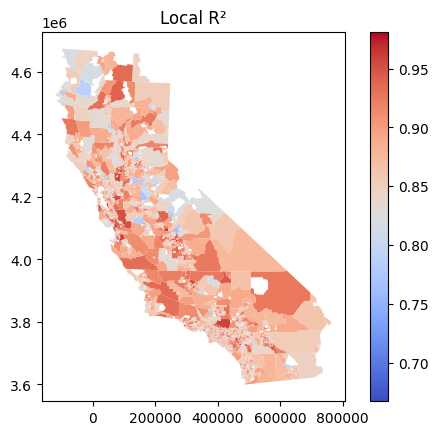

In [38]:
# Step 4: Visualization of Local R²
gdf.plot(column='loc_R2', cmap='coolwarm', legend=True)
plt.title('Local R²')


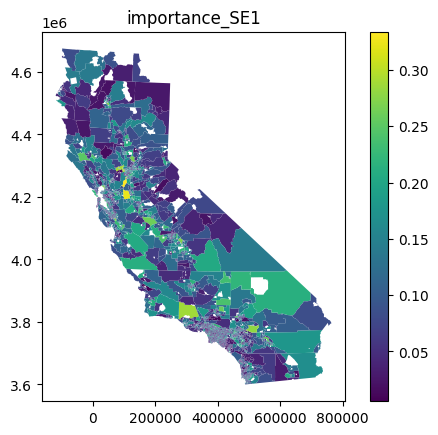

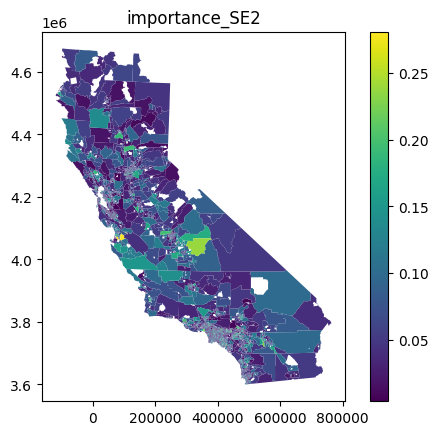

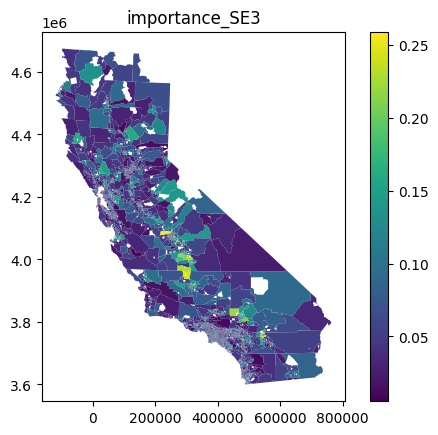

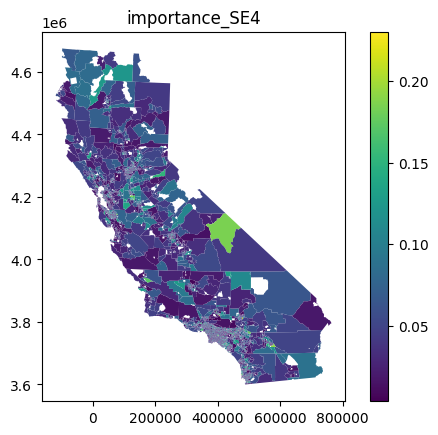

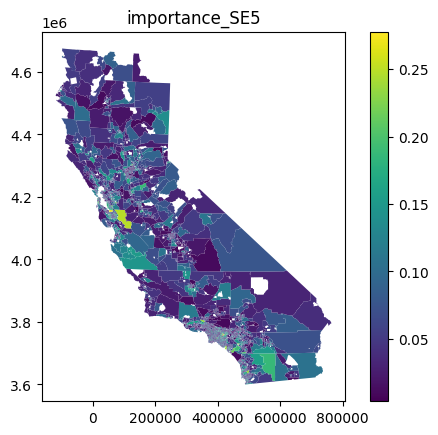

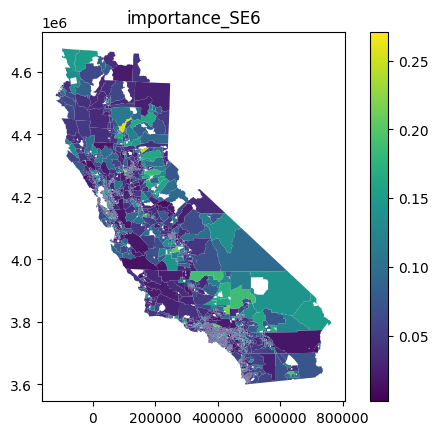

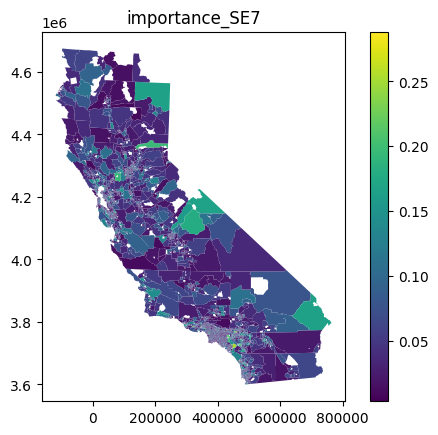

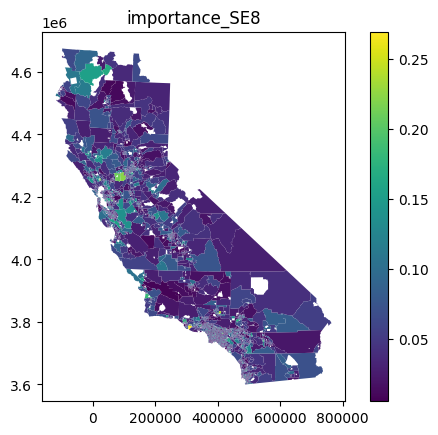

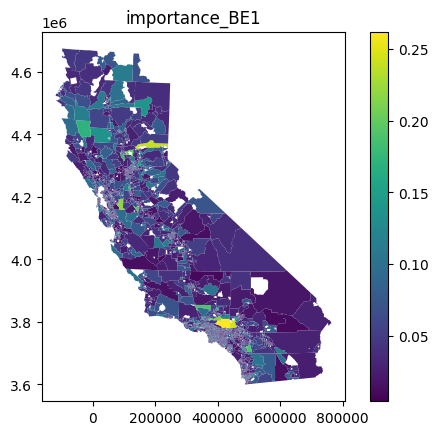

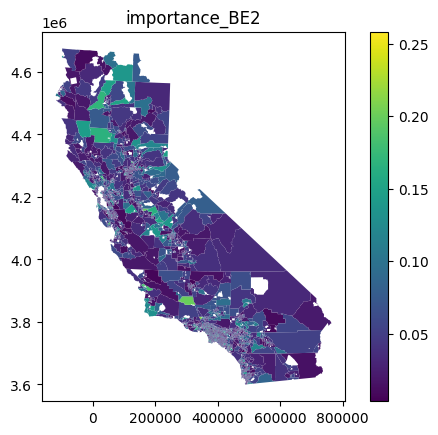

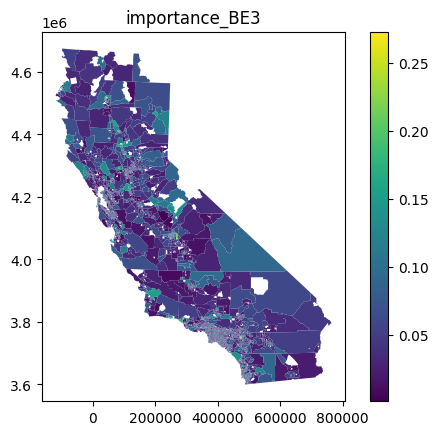

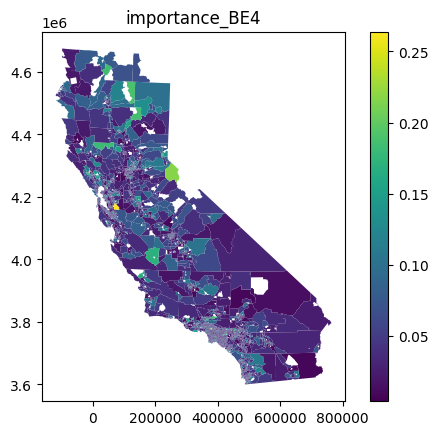

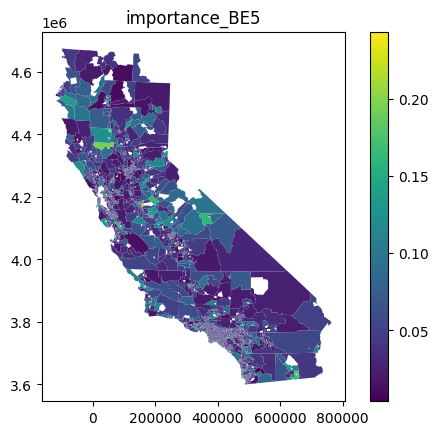

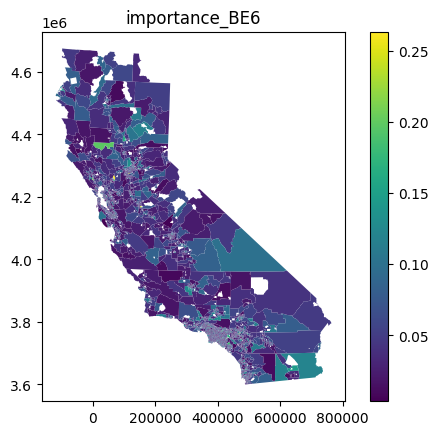

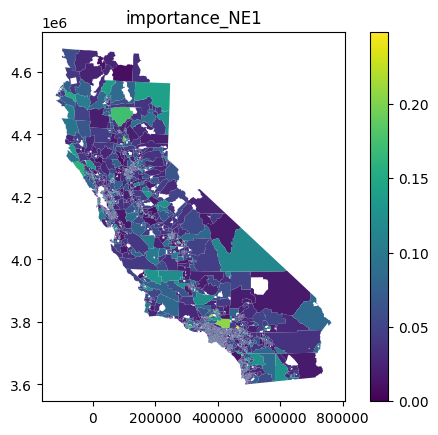

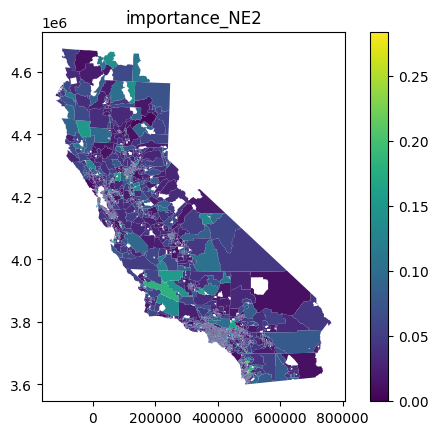

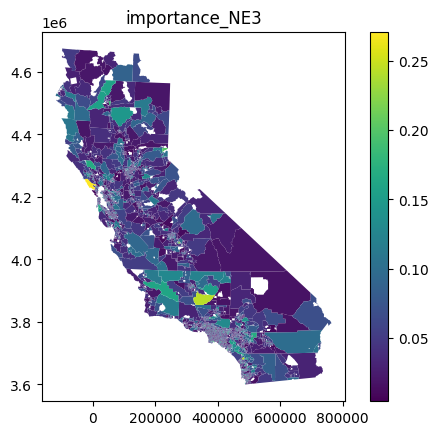

In [39]:
independent_vars = [col for col in gdf.columns[27:] if col != "loc_R2"]
# Step 5: Visualization of Variable Importance
for var in independent_vars:
    gdf.plot(column=f'{var}', cmap='viridis', legend=True)
    plt.title(f'{var}')